In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

To start, let's import the data and see what we're working with

In [2]:
df = pd.read_csv("Logan_housing.csv")
df_raw = df
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


Now let's do some preprocessing to make sure there isn't anything funky going on that will mess with our results.

In [3]:
df.isna().sum()

Sold Price           0
DOM                  0
Garage Capacity      0
HOA Fee              0
Irregular Shape      0
Quadrant             0
School District      0
Sold Terms           0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
Year Built           0
Zip                  0
year_sold            0
month_sold           0
built_after_2000     0
dtype: int64

What a beautiful row of zeros.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [5]:
for col in df.columns:
    print(col, df[col].nunique())

Sold Price 1217
DOM 248
Garage Capacity 14
HOA Fee 96
Irregular Shape 2
Quadrant 4
School District 2
Sold Terms 6
Total Bedrooms 9
Total Bathrooms 7
Total Square Feet 2009
Year Built 136
Zip 16
year_sold 3
month_sold 12
built_after_2000 2


Many of these variables make more sense as categorical variables rather than int/object. Let's change those.

In [6]:
categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip', 'year_sold', 'month_sold', 'built_after_2000']

for col in categorical: 
    df[col] = df[col].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   int64   
 3   HOA Fee            4110 non-null   int64   
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   int64   
 9   Total Bathrooms    4110 non-null   int64   
 10  Total Square Feet  4110 non-null   int64   
 11  Year Built         4110 non-null   int64   
 12  Zip                4110 non-null   category
 13  year_sold          4110 non-null   category
 14  month_sold         4110 non-null   category
 15  built_after_2000   4110 non-null   category
dtypes: cat

Looking much better!

Let's take an overall look at the data to get an idea of what we're working with.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sold Price,4110.0,282125.245499,117864.718806,13000.0,214000.0,260000.0,324900.00,1900000.0
DOM,4110.0,40.550608,51.571991,1.0,6.0,23.0,56.00,712.0
Garage Capacity,4110.0,1.826034,1.094091,0.0,1.0,2.0,2.00,20.0
HOA Fee,4110.0,36.178345,69.565512,0.0,0.0,0.0,65.00,1050.0
Total Bedrooms,4110.0,3.821168,1.182697,1.0,3.0,4.0,5.00,9.0
Total Bathrooms,4110.0,2.577372,0.851165,1.0,2.0,3.0,3.00,7.0
Total Square Feet,4110.0,2370.429440,1049.690077,520.0,1583.0,2141.0,2941.75,10890.0
Year Built,4110.0,1989.287105,31.284714,1879.0,1976.0,2001.0,2012.00,2020.0


It looks like there is an outlier in the data - one home that sold for 1.9 million with a 20 car garage. Let's see if there's just one outlier or more by looking closer at garage capacity and total bedrooms (since both of these are assumed to be positively correlated with things like sold price and DOM).

In [9]:
for col in ['Garage Capacity', 'Total Bedrooms']:
    print(df[col].value_counts())

2     2467
0      546
1      499
3      455
4       96
6       19
5       15
8        4
7        3
12       2
15       1
13       1
9        1
20       1
Name: Garage Capacity, dtype: int64
3    1492
4    1071
5     751
2     394
6     325
7      54
1      16
8       5
9       2
Name: Total Bedrooms, dtype: int64


There are definitely some outliers in this data (around 10 observations on the high end). We know that SVM is sensitive to outliers, so this will be something to keep in mind.

Let's take a look at the correlation heatmap for the data, focusing on sold price at DOM since those will be interesting target variables to look at.

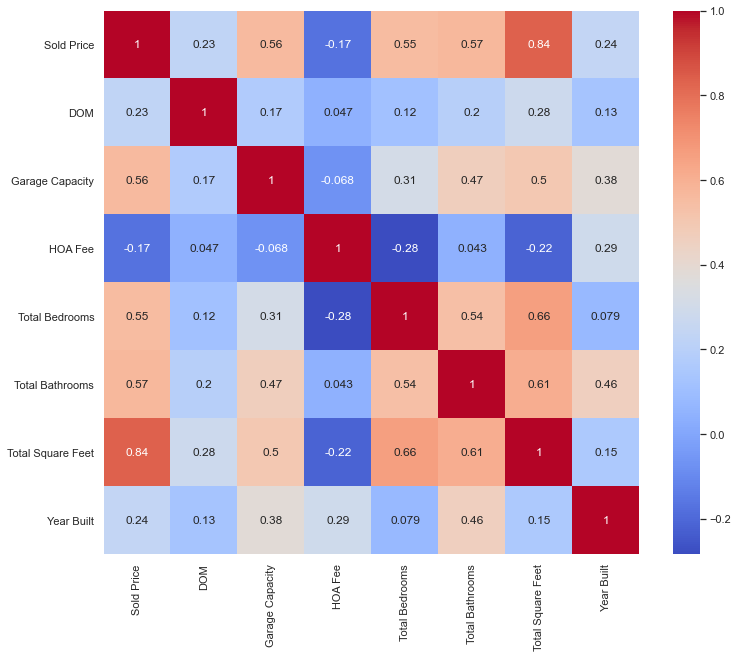

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

Sold Price:
     Total square feet is highly and positively correlated with price, which is to be expected. Surprisingly, though, year built is not highly correlated with price and HOA fee actually has a negative correlation with price.

DOM:
     There are no strong correlations here, which is a surprising find. Total square feet and sold price have the highest correlations with DOM, but the numbers are lower than what we expected.
     
Let's check out a pairplot and see if we find other unexpected patterns.

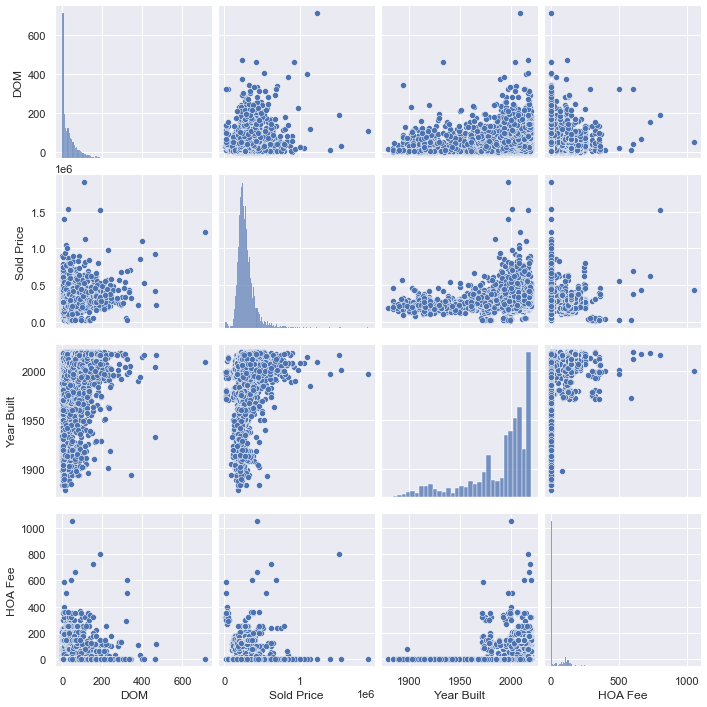

In [11]:
sns.pairplot(df[['DOM', 'Sold Price','Year Built','HOA Fee']])
plt.show()

This confirms our findings from the heat map: we can still see that slight positive correlation between sold price and DOM. Homes with a lower sold price appear more likely to have an HOA fee. Year built has a weak but positive correlation with both sold price and DOM.

After looking over the data, the question we found most interesting is the postitive correlation between sold price and DOM, and we want to explore that fututher using machine learning. The positive correlation is interesting because we might expect this relationship to be negitive intuitivly because people usually are scared of houses that have been on the market for too long. 

Let's start by changing the categorical variables into dummy variables. 

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
df.columns

Index(['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Year Built',
       'Irregular Shape_Yes', 'Quadrant_NW', 'Quadrant_SE', 'Quadrant_SW',
       'School District_Logan', 'Sold Terms_Conventional', 'Sold Terms_FHA',
       'Sold Terms_Other', 'Sold Terms_USDA Rural Development',
       'Sold Terms_VA', 'Zip_84308', 'Zip_84318', 'Zip_84319', 'Zip_84320',
       'Zip_84321', 'Zip_84325', 'Zip_84326', 'Zip_84327', 'Zip_84328',
       'Zip_84332', 'Zip_84333', 'Zip_84335', 'Zip_84338', 'Zip_84339',
       'Zip_84341', 'year_sold_2019', 'year_sold_2020', 'month_sold_2',
       'month_sold_3', 'month_sold_4', 'month_sold_5', 'month_sold_6',
       'month_sold_7', 'month_sold_8', 'month_sold_9', 'month_sold_10',
       'month_sold_11', 'month_sold_12', 'built_after_2000_1'],
      dtype='object')

In [14]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Irregular Shape_Yes,Quadrant_NW,...,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,month_sold_11,month_sold_12,built_after_2000_1
0,176000,5,2,0,3,1,1031,1974,0,1,...,0,0,0,0,0,1,0,0,0,0
1,225000,6,2,0,4,2,2091,1995,0,1,...,0,0,0,1,0,0,0,0,0,0
2,274900,14,2,0,3,1,2016,1980,0,1,...,0,0,0,0,0,0,0,1,0,0
3,175000,16,1,0,4,1,1920,1978,0,1,...,0,0,1,0,0,0,0,0,0,0
4,179000,29,0,0,4,2,1329,1976,0,1,...,0,0,0,0,0,1,0,0,0,0


Looks like that worked, we have 47 variables!

Before running the SVM regression model, we'll need to scale the variables. This will allow us to even out the weights between variables and avoid numerical overflow.

In [15]:
from sklearn.preprocessing import StandardScaler

In [69]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [70]:
df_sc.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Irregular Shape_Yes,Quadrant_NW,...,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,month_sold_11,month_sold_12,built_after_2000_1,liquid
0,-0.900508,-0.689423,0.159024,-0.520125,-0.694402,-1.853418,-1.276179,-0.488704,-0.314065,2.034085,...,-0.334234,-0.358470,-0.359765,-0.361489,3.217700,-0.318255,-0.264112,-0.239522,-1.035672,-0.72343
1,-0.484727,-0.670031,0.159024,-0.520125,0.151225,-0.678414,-0.266234,0.182632,-0.314065,2.034085,...,-0.334234,-0.358470,2.779589,-0.361489,-0.310781,-0.318255,-0.264112,-0.239522,-1.035672,-0.72343
2,-0.061309,-0.514889,0.159024,-0.520125,-0.694402,-1.853418,-0.337693,-0.296894,-0.314065,2.034085,...,-0.334234,-0.358470,-0.359765,-0.361489,-0.310781,-0.318255,3.786267,-0.239522,-1.035672,-0.72343
3,-0.908994,-0.476103,-0.755088,-0.520125,0.151225,-1.853418,-0.429159,-0.360830,-0.314065,2.034085,...,-0.334234,2.789633,-0.359765,-0.361489,-0.310781,-0.318255,-0.264112,-0.239522,-1.035672,-0.72343
4,-0.875052,-0.223998,-1.669200,-0.520125,0.151225,-0.678414,-0.992251,-0.424767,-0.314065,2.034085,...,-0.334234,-0.358470,-0.359765,-0.361489,3.217700,-0.318255,-0.264112,-0.239522,-1.035672,-0.72343


Let's do the train/test split

In [71]:
y = df_sc['Sold Price']
X = df_sc.drop('Sold Price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

We now can train our regression, regressing Sold Price on the rest of the data set.

In [19]:
from sklearn.svm import SVR

In [20]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [21]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [22]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
3940,0.830500,0.642005
2470,0.312895,0.257163
351,-0.620492,-0.499537
3137,-0.485575,-0.351698
2605,0.211071,0.257866


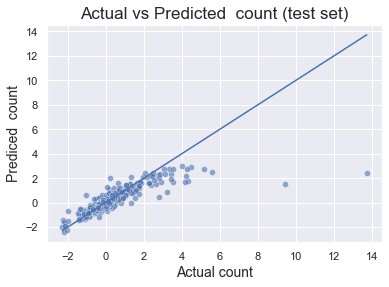

In [23]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

Visually it looks like it is doing a good job in the data set at low numbers, but there are some outliers where the actual count is very high and the predicited count is low. Aside from these outliers, this regression is doing a pretty good job

In [24]:
SVM_regression.score(X_test, y_test)

0.6827356199272642

In [25]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.62

The R^2 statistic is about where we would expect when looking at the graph; it's a good but not perfect fit. The RMSE is low enough to be satisfied with this test.

Lets try and tune those hyperparamiters using gridsearch

In [26]:
my_param_grid = {'C': [1,10,100], 'gamma': ['scaled',0.1,0.01], 'kernel': ['rbf']} 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [31]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [32]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

We have the optimal hyperparameters! Let's use those to predict the new X_test to see if it fits the model any better than our old ones.

In [33]:
y_hat_optimized = grid.predict(X_test)

In [34]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
3940,0.830500,0.642005,0.652705
2470,0.312895,0.257163,0.260629
351,-0.620492,-0.499537,-0.488259
3137,-0.485575,-0.351698,-0.351726
2605,0.211071,0.257866,0.183015


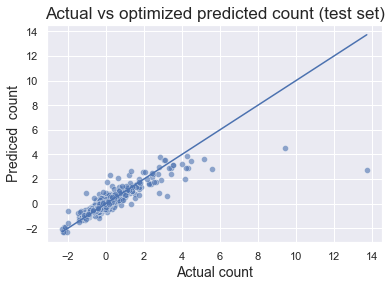

In [35]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

Looks pretty similar to what we had before from a visual standpoint, but lets check our R^2 and RMSE.

In [36]:
grid.score(X_test, y_test)

0.7455631034925809

In [37]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.56

Looks like it really helped our R^2 and our RMSE! 

It increased our R^2 by about .6, and decreased our RMSE by .6 as well. 

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [40]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.4445

Our optimized RMSE_test is .4445

In [72]:
df['DOM'].mean()

40.55060827250608

In [73]:
liquid = np.where(df['DOM']>40.550608,1,0)

In [74]:
df_sc['liquid']=liquid

In [75]:
pd.crosstab(liquid,liquid, normalize='all')*100

col_0,0,1
row_0,,
0,65.644769,0.000000
1,0.000000,34.355231


The variable 'liquid' is relatively balanced.

In [76]:
scale = StandardScaler()
df_sc2 = scale.fit_transform(df)
df_sc2 = pd.DataFrame(df_sc, columns=df.columns)

In [77]:
y = df_sc['liquid']
X = df_sc.drop('liquid', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [78]:
from sklearn.svm import SVC

In [79]:
# Fitting SVM regression to the Training set
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [80]:
# Predicting the Test set results
y_hat = SVM_classification.predict(X_test)

In [81]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.tail(20)

,y_test,y_hat
3469,0,0
3227,1,1
3058,0,0
3955,1,1
1570,0,0
42,1,0
2397,0,0
3696,0,0
942,0,0
4052,0,0


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf'):
    svc= SVC(C=C, gamma=gamma, kernel=kernel)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [83]:
my_SVM_report(X_train, y_train, X_test,y_test, kernel='rbf')

-----------------------------------------
Accuracy  = 0.9367
Error_rate  = 0.0633
Precision = 0.98
Recall    = 0.84
f1_score  = 0.9
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,526,5
Actual : positive,47,244


The above output shows that the model is very accurate and precise. Recall is high, and the F1 score is also very good. These are great scores, and we feel comfortable trusting them because the data is relatively balanced.

We cannot plot the ROC curve and report the AUC score in SVM classification because ROC and AUC test false positives and true positives based on different thresholds and in SVM it doesn't make sense to have different thresholds. 

In [57]:
my_param_grid = {'C': [1,100,1000], 'gamma': ['scaled',0.01,0.001], 'kernel': ['rbf']}

In [58]:
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scaled', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [59]:
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [60]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   10.9s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scaled', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [61]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [63]:
y_hat_optimized = grid.predict(X_test)

In [64]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.tail(20)

,y_test,y_hat,y_hat_optimized
3469,0,0,0
3227,1,1,1
3058,0,0,0
3955,1,1,1
1570,0,0,0
42,1,0,1
2397,0,0,0
3696,0,0,0
942,0,0,0
4052,0,0,0


In [65]:
my_SVM_report(X_train, y_train, X_test,y_test,C=1000, gamma=0.001)

-----------------------------------------
Accuracy  = 0.9891
Error_rate  = 0.0109
Precision = 0.98
Recall    = 0.99
f1_score  = 0.98
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,526,5
Actual : positive,4,287


This output is even better than before (yay for optimizing!). We're very closing to 100% accuracy with a very high F1 score, and with relatively balanced data the model is doing extremely well.

In [66]:
f1_score = cross_val_score(estimator = SVC(C=1000, gamma=0.001), X = X_train, y = y_train, cv = 5 , scoring="f1" )

In [67]:
f1_score

array([0.96860987, 0.97977528, 0.95535714, 0.9751693 , 0.96888889])

In [68]:
f1_CV=round(f1_score.mean(),4)
f1_CV

0.9696

Predicting the liquidity for a house would be helpful to home owners and real estate agents because it would give them an idea of whether or not a specific house is likely to sell quickly, based on characteristics like square footage, location, etc. Having a model like this would also allow the agents/homeowners to estimate how much the listing price will need to be to get a home to sell quickly (a must in some circumstances).